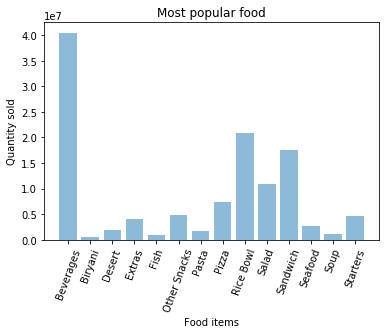

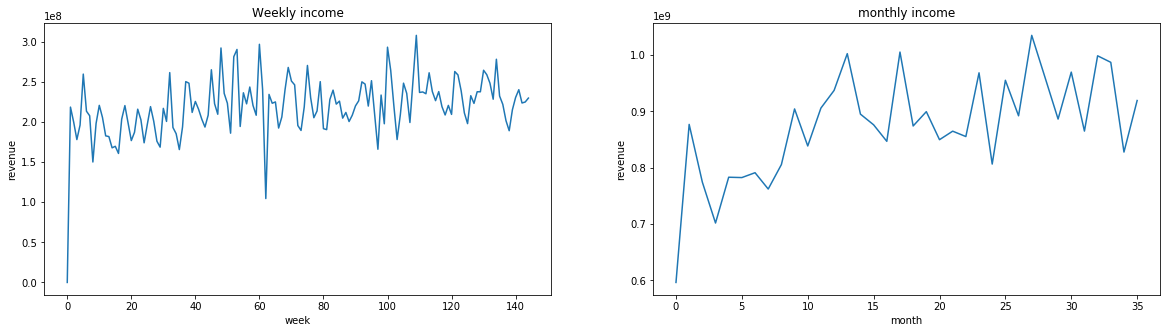

In [64]:

'''Note:
* Before writing any code remember that this assigment is for helping you understand the
basics of file
handling in csv file.
* This project is designed to have a work flow such that everyone is in same page for thi
s purpose the variables are
given a strict name which should not be changed or modified according to your convinience
* Few of new functions like .head() .xticks().... and concepts may have been introduced i
n the assingment, so we encourage you
all to go through them without skipping.
* functions which are to be used in the Your code sections are globally available so try
to look for those where you have been prompted
'''
'''Its the data of a meal delivery company which operates in multiple cities.
They have various fulfillment centers in these cities for dispatching meal orders to thei
r customers.
train.csv: Historical data of demand for a product-center combination
fulfilment_center_info.csv: Information for fulfillment center like center area, city inf
ormation etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and d
iscount'''
'''START CODE'''
#Import necessary libraries: Numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided
df_meal=pd.read_csv(r"C:\Users\pc\Downloads\train_GzS76OK\meal_info.csv")

df_meal.head()
#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided
df_center=pd.read_csv(r"C:\Users\pc\Downloads\train_GzS76OK\fulfilment_center_info.csv")

df_center.head()
#read train.csv file from provided dataset
#Note: Proper file directory should be provided
df_food=pd.read_csv(r"C:\Users\pc\Downloads\train_GzS76OK\train.csv")

df_food.head()
'''Since the provided information is in different files, your work here is to merge them.
Look for the functions
in pandas library to do so'''
df=pd.merge(pd.merge(df_center,df_food,on="center_id"),df_meal,on="meal_id")

'''Here we have used pd.pivot_table() kindly go through the function and mention in comme
nt what it does'''
#Create a spreadsheet-style pivot table as a DataFrame.
#The levels in the pivot table will be stored in MultiIndex objects on the index and columns of the result DataFrame.
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(
y-axis)
give x label 'Food items'
give y label 'Quantity sold'

'''

objects=[]
for item in np.sort(df['category'].unique()):
    objects.append(item)
    
y_pos=np.arange(len(table['num_orders']))
#bar graph
plt.bar(y_pos,table['num_orders'],align='center',alpha=0.5)
#xticks
plt.xticks(y_pos, objects)
plt.xticks(rotation=70) #alligns xobjects at an angle
#plot title
plt.title("Most popular food")
#x-axis labels
plt.xlabel("Food items")
#y-axis labels
plt.ylabel("Quantity sold")
#save plot
plt.savefig("Most popular food.png")
#display
plt.show()

'''************************************************'''
'''Comparison of weekly and monthly sales
Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders
** named 'month' by using ['week'] column (week column value divided by 4 gives month val
ue)'''
df["revenue"]=df['checkout_price']*df['num_orders']
df['revenue']

df['month']=(df['week'])//4
df['month']

'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue
month=[]
month_order=[]
    
table1=pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)    


for x in range(36):
    month.append(x)
month    

month_o=[]
for x in table1["revenue"]:
    month_o.append(x)

month_order=month_o[0:36]


'''Here we have created two list week and week_order ,you need to store in them mapping t
he monthly orders'''
#list to store week-wise revenue
week=[]
week_order=[]
table2=pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)


for x in range(145):
    week.append(x)
week 


for x in table2['revenue']:
    week_order.append(x)
week_order=[0]+week_order[0:144]  

''' Plot two subplots in the same space : one for weekly revenue and other for monthly re
venue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly r
evenue.
'''
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

plt.plot(week,week_order)
plt.title('Weekly income')
plt.xlabel("week")
plt.ylabel('revenue')

plt.subplot(1,2,2)

plt.plot(month,month_order)
plt.title('monthly income')
plt.xlabel("month")
plt.ylabel('revenue')

#display plot
plt.show()


